In [1]:
import pandas as pd

# CSV Files aus weather_and_wildfires.ipynb laden
df3 = pd.read_csv('df3_data.csv')
wf = pd.read_csv('wf_data.csv')

Durch das Laden des CSV Files sind Datetime Datentypen verloren gegangen - Anpassen

In [2]:
# Rename column um Analyse zu vereinfachen
wf.rename(columns={'combined_discovery_date': 'date'}, inplace=True)

In [3]:
# Ändere combined_control_date in datetime
wf['combined_control_date'] = pd.to_datetime(wf['combined_control_date'])
# Ändere combined_discovery_date in datetime
wf['date'] = pd.to_datetime(wf['date'])

In [4]:
df3['date'] = pd.to_datetime(df3['date'])

In [5]:
# Rename column um Analyse zu vereinfachen
df3.rename(columns={'states': 'state_name'}, inplace=True)

In [6]:
wf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674438 entries, 0 to 1674437
Data columns (total 22 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   unique_id                   1674438 non-null  int64         
 1   source_reporting_unit_name  1674438 non-null  object        
 2   gov_firecode                1674350 non-null  object        
 3   fire_name                   1671149 non-null  object        
 4   cause_code                  1674438 non-null  int64         
 5   cause_descr                 1674438 non-null  object        
 6   fire_size                   1674438 non-null  float64       
 7   fire_size_class             1674438 non-null  object        
 8   latitude                    1674438 non-null  float64       
 9   longitude                   1674438 non-null  float64       
 10  county                      1674438 non-null  object        
 11  shape_hex               

In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550396 entries, 0 to 550395
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   date                  550396 non-null  datetime64[ns]
 1   average_temp_c        474561 non-null  float64       
 2   minimum_temp_c        502218 non-null  float64       
 3   maximum_temp_c        502541 non-null  float64       
 4   precipitation_mm      442942 non-null  float64       
 5   snow_mm               322039 non-null  float64       
 6   wind_direction_deg    116755 non-null  float64       
 7   windspeed_kmh         479642 non-null  float64       
 8   peak_wind_gust_kmh    19844 non-null   float64       
 9   air_pressure_hpa      412122 non-null  float64       
 10  sunshine_min          96923 non-null   float64       
 11  station_id            550396 non-null  object        
 12  weather_station_name  550396 non-null  object        
 13 

In [8]:
wf.head()

,unique_id,source_reporting_unit_name,gov_firecode,fire_name,cause_code,cause_descr,fire_size,fire_size_class,latitude,longitude,...,combined_control_date,date,burning_time,state_name,c_year,c_month,c_weekday,d_year,d_month,d_weekday
0,1370840,Tehama-Glenn Unit,undefined,"""BERREY,T""",8,Children,1.5,B,40.281111,-122.340000,...,NaT,1999-08-16,NaN,California,NaN,NaN,NaN,1999,8,0
1,1370842,Tehama-Glenn Unit,undefined,"""WARREN,R""",9,Miscellaneous,2.0,B,40.150000,-122.303889,...,NaT,2000-05-29,NaN,California,NaN,NaN,NaN,2000,5,0
2,1370843,Tehama-Glenn Unit,undefined,REMUNDA,9,Miscellaneous,3.0,B,40.008889,-122.433056,...,NaT,2000-06-09,NaN,California,NaN,NaN,NaN,2000,6,4
3,1370844,Tehama-Glenn Unit,undefined,"""EICHENSEE, H.""",9,Miscellaneous,2.0,B,39.921944,-122.395000,...,NaT,2000-06-20,NaN,California,NaN,NaN,NaN,2000,6,1
4,1370846,Tehama-Glenn Unit,undefined,"""POCHOP,J""",9,Miscellaneous,0.3,B,40.106944,-122.190000,...,NaT,2000-07-02,NaN,California,NaN,NaN,NaN,2000,7,6


Wetterdaten DF3 hat wegen der eigenen Auswahl der Wetterstationen nicht alle Bundesstaaten abgedeckt in denen Brände herrschen - Nicht wirklich relevant für unsere Analyse (z.B. Rhode Island)

In [9]:
unique_states = wf['state_name'].unique()
print(unique_states)


['California' 'New York' 'Kentucky' 'Texas' 'Florida' 'Arkansas' 'Nevada'
 'Nebraska' 'New Mexico' 'Colorado' 'Maine' 'Pennsylvania' 'Louisiana'
 'North Dakota' 'Alabama' 'Oklahoma' 'Virginia' 'Connecticut' 'Montana'
 'Wyoming' 'Arizona' 'Washington' 'Georgia' 'Minnesota' 'Ohio' 'Oregon'
 'South Dakota' 'South Carolina' 'Kansas' 'Massachusetts' 'Hawaii'
 'Mississippi' 'Missouri' 'Utah' 'Idaho' 'Michigan' 'North Carolina'
 'Wisconsin' 'Tennessee' 'Iowa' 'New Hampshire' 'Illinois' 'Indiana'
 'West Virginia' 'Vermont' 'New Jersey' 'Maryland' 'Delaware'
 'Puerto Rico' 'District of Columbia' 'Alaska' 'Rhode Island']


In [10]:
unique_states = df3['state_name'].unique()
print(unique_states)

['North Dakota' 'Arizona' 'Oregon' 'Wyoming' 'Ontario, Canada' 'Michigan'
 'Utah' 'Quebec, Canada' 'Illinois' 'Northwest Territories, Canada'
 'Colorado' 'Georgia' 'Alaska' 'Mississippi' 'Arkansas' 'South Carolina'
 'Florida' 'Virginia' 'Texas' 'California' 'Nevada' 'New Mexico'
 'Louisiana' 'Tennessee' 'Alabama' 'Oklahoma' 'South Dakota' 'Idaho'
 'Kentucky' 'Missouri' 'North Carolina' 'Washington' 'Nebraska' 'Montana'
 'Minnesota' 'Massachusetts' 'New York']


In [12]:
# Anzahl der Feuer am Tag
fires_per_day = wf.groupby(wf['date'].dt.date)['unique_id'].nunique()
print(fires_per_day)

date
1995-01-01    18
1995-01-02    33
1995-01-03    38
1995-01-04    67
1995-01-05    92
              ..
2015-12-27    11
2015-12-28    20
2015-12-29    26
2015-12-30    17
2015-12-31    22
Name: unique_id, Length: 7670, dtype: int64


In [13]:
#Anzahl der Feuer am Tag pro Bundesstaat - unique_id gibt die Anzahl der Feuer an
fires_per_state_per_day = wf.groupby(['state_name', wf['date'].dt.date])['unique_id'].nunique().reset_index()
print(fires_per_state_per_day)

       state_name        date  unique_id
0         Alabama  1995-01-02          1
1         Alabama  1995-01-03          2
2         Alabama  1995-01-04          3
3         Alabama  1995-01-05         10
4         Alabama  1995-01-06          3
...           ...         ...        ...
187232    Wyoming  2015-12-04          2
187233    Wyoming  2015-12-05          1
187234    Wyoming  2015-12-08          1
187235    Wyoming  2015-12-12          1
187236    Wyoming  2015-12-31          1

[187237 rows x 3 columns]


In [14]:
#Füge die Regendaten den Wildfire Daten als Merge hinzu
#Outer - weil es nicht an jedem Tag gebrannt hat - wir berücksichtigen jedoch alle Tage für die Analyse
merged_df = wf.merge(df3, on=['date', 'state_name'], how='outer')

# Ergebnis des Merge: result
result = merged_df.groupby(['state_name', merged_df['date'].dt.date])['unique_id', 'precipitation_mm'].agg({'unique_id': 'nunique', 'precipitation_mm': 'sum'}).reset_index()
print(result)


/var/folders/td/x_4chtgd2350zf0kdhtw5vgc0000gn/T/ipykernel_37077/1783069119.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = merged_df.groupby(['state_name', merged_df['date'].dt.date])['unique_id', 'precipitation_mm'].agg({'unique_id': 'nunique', 'precipitation_mm': 'sum'}).reset_index()


       state_name        date  unique_id  precipitation_mm
0         Alabama  1995-01-01          0               7.9
1         Alabama  1995-01-02          1               0.0
2         Alabama  1995-01-03          2               0.3
3         Alabama  1995-01-04          3               0.0
4         Alabama  1995-01-05         10               0.0
...           ...         ...        ...               ...
315524    Wyoming  2015-12-27          0               0.0
315525    Wyoming  2015-12-28          0               0.0
315526    Wyoming  2015-12-29          0               0.0
315527    Wyoming  2015-12-30          0               0.9
315528    Wyoming  2015-12-31          1               0.0

[315529 rows x 4 columns]


In [15]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315529 entries, 0 to 315528
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   state_name        315529 non-null  object 
 1   date              315529 non-null  object 
 2   unique_id         315529 non-null  int64  
 3   precipitation_mm  315529 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.6+ MB


In [16]:
# Ändere Date in Datetype Datatype
result['date'] = pd.to_datetime(df3['date'])

In [17]:
#Check Null Values
null_values = result.isnull()
null_counts = null_values.sum()
print(null_counts)

state_name          0
date                0
unique_id           0
precipitation_mm    0
dtype: int64


In [18]:
# Korrelation der Anzahl der Feuer und Precipitation
correlation = result['unique_id'].corr(result['precipitation_mm'])
print(f"Die Korrelation zwischen Anzahl der Feuer und Regen: {correlation}")

Korrelation zwischen unique_id und precipitation_mm: 0.1082637697567783


Ungeclusterte Korrelations-Analyse

Ergebnisse geben nicht nachvollziehbare Ergebnisse ab (leichte Korrelation zwischen erhöhten Regenmengen, steigende Anzahl an Feuer)

In [19]:
#Korrelation by State
correlations_by_state = result.groupby('state_name').apply(lambda group: group['unique_id'].corr(group['precipitation_mm'])).reset_index()
correlations_by_state.columns = ['state_name', 'correlation']
# Absteigende Reihenfolge
correlations_by_state = correlations_by_state.sort_values(by='correlation', ascending=False)
print(correlations_by_state)

#Ergebnis: 1. Florida, 2.Alaksa, 3.Montana zeigen eine schwache Korrelation auf (0.2 - 0.3)

                       state_name  correlation
9                         Florida     0.292160
1                          Alaska     0.222988
26                        Montana     0.208380
46                      Tennessee     0.172766
17                       Kentucky     0.160828
31                     New Mexico     0.146144
45                   South Dakota     0.138540
23                      Minnesota     0.138206
12                          Idaho     0.133128
22                       Michigan     0.093159
18                      Louisiana     0.087847
24                    Mississippi     0.078815
51                     Washington     0.071855
27                       Nebraska     0.065801
33                 North Carolina     0.063522
50                       Virginia     0.063495
0                         Alabama     0.062305
47                          Texas     0.059104
48                           Utah     0.042921
2                         Arizona     0.042750
13           

In [20]:
correlations_by_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 9 to 53
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state_name   55 non-null     object 
 1   correlation  32 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


Top Staaten - Anzahl der Feuer

Durchschnittliche Korrelation für ausgewählte Bundesstaaten: 0.044251809821334816


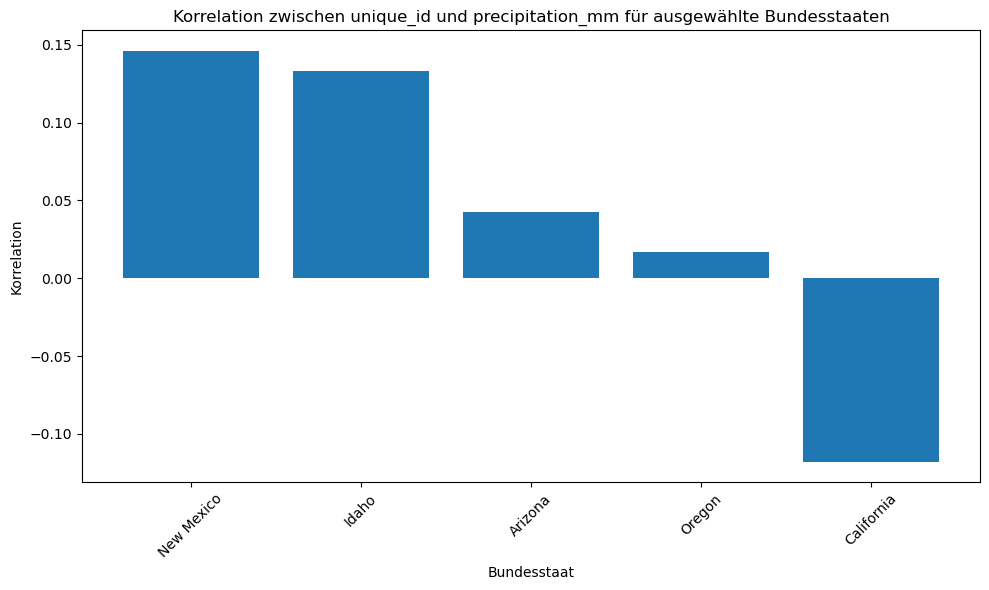

In [21]:
import matplotlib.pyplot as plt

# Die Top 5 Staaten aus Doms Analyse
selected_states = ['Idaho', 'Oregon', 'California', 'Arizona', 'New Mexico']
selected_data = result[result['state_name'].isin(selected_states)]

# Gruppiere die ausgewählten Daten nach "state_name" und berechne die Korrelation zwischen "unique_id" und "precipitation_mm"
correlations_by_state = selected_data.groupby('state_name').apply(lambda group: group['unique_id'].corr(group['precipitation_mm'])).reset_index()
correlations_by_state.columns = ['state_name', 'correlation']

# Reihenfolge
correlations_by_state = correlations_by_state.sort_values(by='correlation', ascending=False)

# Plotte die Korrelationen
plt.figure(figsize=(10, 6))
plt.bar(correlations_by_state['state_name'], correlations_by_state['correlation'])
plt.xlabel('Bundesstaat')
plt.ylabel('Korrelation')
plt.title('Korrelation zwischen unique_id und precipitation_mm für ausgewählte Bundesstaaten')
plt.xticks(rotation=45)
plt.tight_layout()

# Berechne den durchschnittlichen Korrelationswert für alle ausgewählten Bundesstaaten
average_correlation = correlations_by_state['correlation'].mean()

# Gib den durchschnittlichen Korrelationswert aus
print(f'Durchschnittliche Korrelation für ausgewählte Bundesstaaten: {average_correlation}')
plt.show()

# Durschnitt für die 5 Staaten 0.044 und 0.15 New Mexico als Top - Sehr schwache Korrelation

Top Staaten - Fire Size

In [22]:
#Summe Feuergröße per Tag
fire_size_per_day = wf.groupby(wf['date'].dt.date)['fire_size'].sum()
print(fire_size_per_day)

date
1995-01-01      35.72
1995-01-02    2349.79
1995-01-03      51.78
1995-01-04     139.46
1995-01-05     374.78
               ...   
2015-12-27     303.81
2015-12-28      16.72
2015-12-29       8.90
2015-12-30       9.32
2015-12-31      26.13
Name: fire_size, Length: 7670, dtype: float64


In [23]:
#Merge Wetterdaten
merged_df = wf.merge(df3, on=['date', 'state_name'], how='outer')

#Ergänze "result" mit Fire_Size 
result = merged_df.groupby(['state_name', merged_df['date'].dt.date])['unique_id', 'precipitation_mm'].agg({'unique_id': 'nunique', 'precipitation_mm': 'sum'}).reset_index()
fire_size_per_day = wf.groupby(wf['date'].dt.date)['fire_size'].sum()
result['fire_size_per_day'] = result['date'].map(fire_size_per_day)
print(result)


/var/folders/td/x_4chtgd2350zf0kdhtw5vgc0000gn/T/ipykernel_37077/2239258952.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = merged_df.groupby(['state_name', merged_df['date'].dt.date])['unique_id', 'precipitation_mm'].agg({'unique_id': 'nunique', 'precipitation_mm': 'sum'}).reset_index()


       state_name        date  unique_id  precipitation_mm  fire_size_per_day
0         Alabama  1995-01-01          0               7.9              35.72
1         Alabama  1995-01-02          1               0.0            2349.79
2         Alabama  1995-01-03          2               0.3              51.78
3         Alabama  1995-01-04          3               0.0             139.46
4         Alabama  1995-01-05         10               0.0             374.78
...           ...         ...        ...               ...                ...
315524    Wyoming  2015-12-27          0               0.0             303.81
315525    Wyoming  2015-12-28          0               0.0              16.72
315526    Wyoming  2015-12-29          0               0.0               8.90
315527    Wyoming  2015-12-30          0               0.9               9.32
315528    Wyoming  2015-12-31          1               0.0              26.13

[315529 rows x 5 columns]


In [88]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315529 entries, 0 to 315528
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       315529 non-null  datetime64[ns]
 1   state_name                 315529 non-null  object        
 2   unique_id                  315529 non-null  int64         
 3   precipitation_mm           315529 non-null  float64       
 4   fire_size_per_day          315529 non-null  float64       
 5   fire_duration_per_day      315529 non-null  float64       
 6   precipitation_mm_rounded   315529 non-null  int64         
 7   fire_size_per_day_rounded  315529 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 19.3+ MB


In [89]:
result['date'] = pd.to_datetime(result['date'])

In [25]:
# Korrelation Bundesstaaten und Firesize
correlations_by_size = result.groupby('state_name').apply(lambda group: group['fire_size_per_day'].corr(group['precipitation_mm'])).reset_index()
correlations_by_size.columns = ['state_name', 'correlation']
correlations_by_size = correlations_by_size.sort_values(by='correlation', ascending=False)
print(correlations_by_size)

# 1. Alaska, 2. Florida, 3. Montana - Sehr sehr schwache Korrelation (0.04-0.07)


                       state_name  correlation
1                          Alaska     0.068857
9                         Florida     0.059828
26                        Montana     0.049630
35  Northwest Territories, Canada     0.033043
31                     New Mexico     0.028967
45                   South Dakota     0.028358
27                       Nebraska     0.026462
2                         Arizona     0.024113
44                 South Carolina     0.023003
17                       Kentucky     0.020623
33                 North Carolina     0.017508
5                        Colorado     0.016266
0                         Alabama     0.014996
25                       Missouri     0.014318
24                    Mississippi     0.013939
10                        Georgia     0.013782
23                      Minnesota     0.012398
38                Ontario, Canada     0.011532
37                       Oklahoma     0.009679
13                       Illinois     0.009289
54           

Durchschnittliche Korrelation für ausgewählte Bundesstaaten: -0.006476918262907913


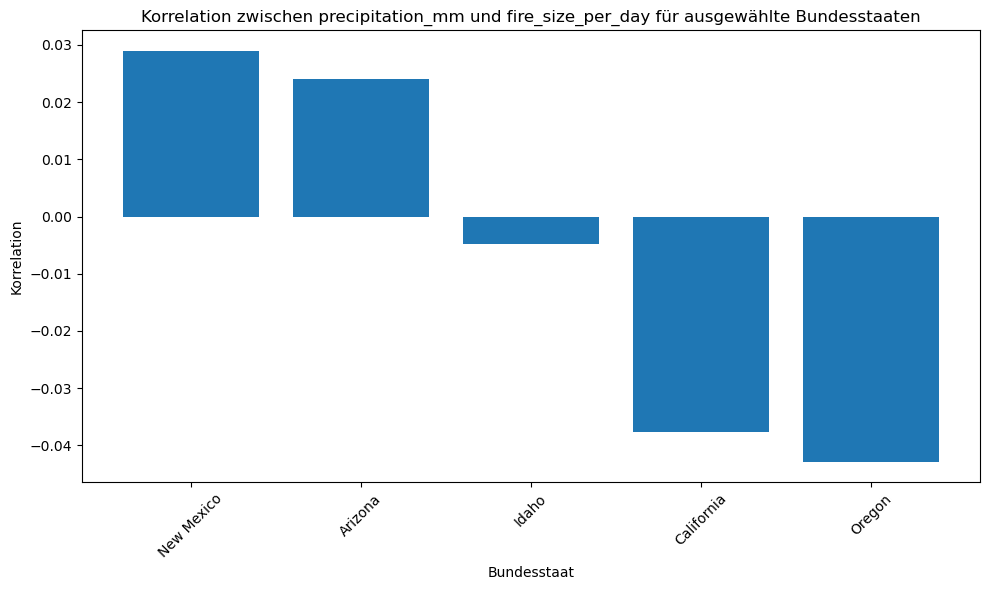

In [26]:
#Top 5 Staaten - Firesize 

# Top 5 Staaten
selected_states = ['Idaho', 'Oregon', 'California', 'Arizona', 'New Mexico']
selected_data = result[result['state_name'].isin(selected_states)]

correlations_by_size = selected_data.groupby('state_name').apply(lambda group: group['precipitation_mm'].corr(group['fire_size_per_day'])).reset_index()
correlations_by_size.columns = ['state_name', 'correlation']

# Reihenfolge
correlations_by_size = correlations_by_size.sort_values(by='correlation', ascending=False)

# Plotte die Korrelationen
plt.figure(figsize=(10, 6))
plt.bar(correlations_by_size['state_name'], correlations_by_size['correlation'])
plt.xlabel('Bundesstaat')
plt.ylabel('Korrelation')
plt.title('Korrelation zwischen precipitation_mm und fire_size_per_day für ausgewählte Bundesstaaten')
plt.xticks(rotation=45)
plt.tight_layout()

# Berechne den durchschnittlichen Korrelationswert für alle ausgewählten Bundesstaaten
average_correlation = correlations_by_size['correlation'].mean()
print(f'Durchschnittliche Korrelation für ausgewählte Bundesstaaten: {average_correlation}')
plt.show()

# Durschnitt -0.0065 , Oregon Top Korrelation mit -0,04 - Keine Korrelation erkennbar

Top Staaten - Burning Time

In [27]:
# Summe Burning Time
fire_duration_per_day = wf.groupby(wf['date'].dt.date)['burning_time'].sum()

In [28]:
#Füge Burning Time Result hinzu

fire_duration_per_day = wf.groupby(wf['date'].dt.date)['burning_time'].sum()
result.set_index('date', inplace=True)
result['fire_duration_per_day'] = fire_duration_per_day
result.reset_index(inplace=True)
print(result)

              date state_name  unique_id  precipitation_mm  fire_size_per_day  \
0       1995-01-01    Alabama          0               7.9              35.72   
1       1995-01-02    Alabama          1               0.0            2349.79   
2       1995-01-03    Alabama          2               0.3              51.78   
3       1995-01-04    Alabama          3               0.0             139.46   
4       1995-01-05    Alabama         10               0.0             374.78   
...            ...        ...        ...               ...                ...   
315524  2015-12-27    Wyoming          0               0.0             303.81   
315525  2015-12-28    Wyoming          0               0.0              16.72   
315526  2015-12-29    Wyoming          0               0.0               8.90   
315527  2015-12-30    Wyoming          0               0.9               9.32   
315528  2015-12-31    Wyoming          1               0.0              26.13   

        fire_duration_per_d

In [33]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315529 entries, 0 to 315528
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   315529 non-null  object 
 1   state_name             315529 non-null  object 
 2   unique_id              315529 non-null  int64  
 3   precipitation_mm       315529 non-null  float64
 4   fire_size_per_day      315529 non-null  float64
 5   fire_duration_per_day  315529 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 14.4+ MB


In [29]:
# Zeige Korrelation Staat und Burning Time
correlations_by_burning_time = result.groupby('state_name').apply(lambda group: group['fire_duration_per_day'].corr(group['precipitation_mm'])).reset_index()
correlations_by_burning_time.columns = ['state_name', 'correlation']
correlations_by_burning_time = correlations_by_burning_time.sort_values(by='correlation', ascending=False)
print(correlations_by_burning_time)

#1. Alaska, 2. Montana, 3. NY - schwache Korrelation (0.05 - 0.11)

                       state_name  correlation
1                          Alaska     0.111068
26                        Montana     0.083792
32                       New York     0.059235
45                   South Dakota     0.045417
35  Northwest Territories, Canada     0.033462
31                     New Mexico     0.032778
38                Ontario, Canada     0.032269
47                          Texas     0.029281
27                       Nebraska     0.025922
13                       Illinois     0.024094
44                 South Carolina     0.023378
2                         Arizona     0.021098
0                         Alabama     0.020044
12                          Idaho     0.017655
25                       Missouri     0.013369
9                         Florida     0.013328
5                        Colorado     0.012265
22                       Michigan     0.011802
24                    Mississippi     0.010590
10                        Georgia     0.008411
33           

Durchschnittliche Korrelation für ausgewählte Bundesstaaten: -0.008369459816868914


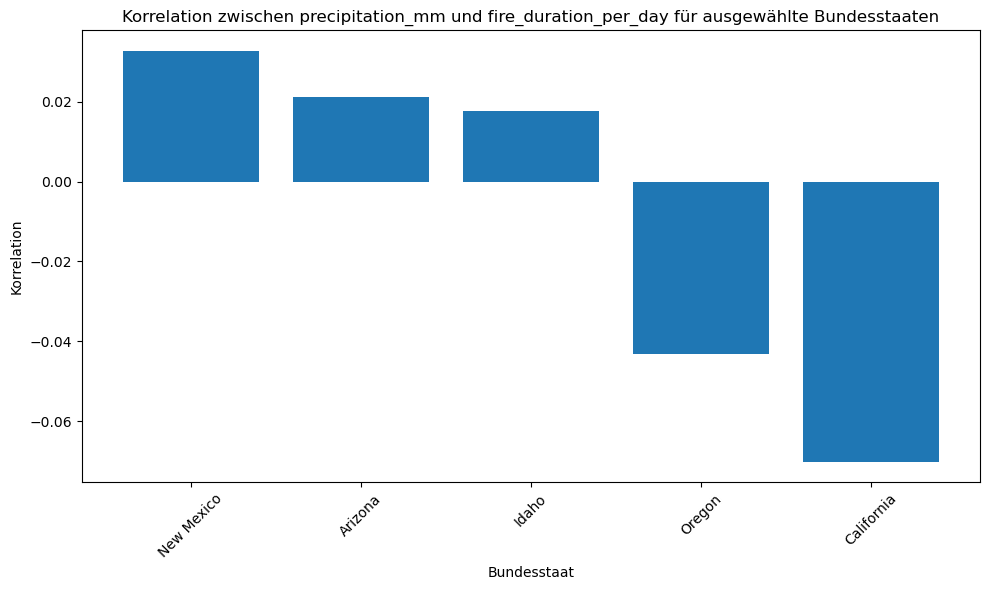

In [30]:
# Korrelation Top 5 Staaten & Burning Time

fire_duration_per_day = wf.groupby(wf['date'].dt.date)['burning_time'].sum()

# Füge die "fire_duration_per_day"-Daten dem "result"-DataFrame hinzu
result['fire_duration_per_day'] = result['date'].map(fire_duration_per_day)

# Top 5 Staaten
selected_states = ['Idaho', 'Oregon', 'California', 'Arizona', 'New Mexico']
selected_data = result[result['state_name'].isin(selected_states)]

correlations_by_burning_time = selected_data.groupby('state_name').apply(lambda group: group['precipitation_mm'].corr(group['fire_duration_per_day'])).reset_index()
correlations_by_burning_time.columns = ['state_name', 'correlation']
correlations_by_burning_time = correlations_by_burning_time.sort_values(by='correlation', ascending=False)

# Plotte die Korrelationen
plt.figure(figsize=(10, 6))
plt.bar(correlations_by_burning_time['state_name'], correlations_by_burning_time['correlation'])
plt.xlabel('Bundesstaat')
plt.ylabel('Korrelation')
plt.title('Korrelation zwischen precipitation_mm und fire_duration_per_day für ausgewählte Bundesstaaten')
plt.xticks(rotation=45)
plt.tight_layout()

# Berechne den durchschnittlichen Korrelationswert für alle ausgewählten Bundesstaaten
average_correlation = correlations_by_burning_time['correlation'].mean()
print(f'Durchschnittliche Korrelation für ausgewählte Bundesstaaten: {average_correlation}')
plt.show()

# Durschnitt -0.008 , Oregon Top Korrelation mit 0.03 - Keine Korrelation erkennbar

Angepasst an die Analyse der Avrg Temperatur, wird die Regenmenge in 34 Intervallen geclustert, um graphisch übereinstimmende Vergleiche zu tätigen.

Mit den geclusterten Daten werden Korrelationsanalysen geführt

Precipitation Skala - Day

Light Rain	<= 60mm	
Moderate Rain 61 <=> 182
Heavy Rain 183 =>

https://en.wikipedia.org/wiki/Rain#:~:text=Light%20rain%20—%20when%20the%20precipitation,50%20mm%20(2.0%20in)%20per

Anzahl der Waldbrände - Gesamt USA

In [90]:
# Intervalle
num_intervals = 34

# Mindest- und Maximalwert der "precipitation_mm"-Spalte
min_value = result['precipitation_mm'].min()
max_value = result['precipitation_mm'].max()

# Erzeuge die Intervalle
intervals = pd.cut(result['precipitation_mm'], bins=num_intervals, precision=2, include_lowest=True)

# Gruppierung und Zählen der Waldbrände in den Intervallen
grouped_data = result.groupby(intervals)['unique_id'].count().reset_index()
grouped_data.rename(columns={'unique_id': 'Anzahl_der_Wildfires'}, inplace=True)

print(grouped_data)

# Die große Mehrheit an Wildfire entstanden an Tagen mit geringer Regenmenge 

      precipitation_mm  Anzahl_der_Wildfires
0      (-6.33, 185.89]                313280
1     (185.89, 371.79]                  1190
2     (371.79, 557.68]                   414
3     (557.68, 743.58]                   220
4     (743.58, 929.47]                   134
5    (929.47, 1115.36]                    70
6   (1115.36, 1301.26]                    71
7   (1301.26, 1487.15]                    46
8   (1487.15, 1673.05]                    24
9   (1673.05, 1858.94]                    14
10  (1858.94, 2044.84]                    15
11  (2044.84, 2230.73]                    17
12  (2230.73, 2416.62]                     3
13  (2416.62, 2602.52]                     4
14  (2602.52, 2788.41]                     6
15  (2788.41, 2974.31]                     4
16   (2974.31, 3160.2]                     1
17   (3160.2, 3346.09]                     0
18  (3346.09, 3531.99]                     1
19  (3531.99, 3717.88]                     3
20  (3717.88, 3903.78]                     3
21  (3903.

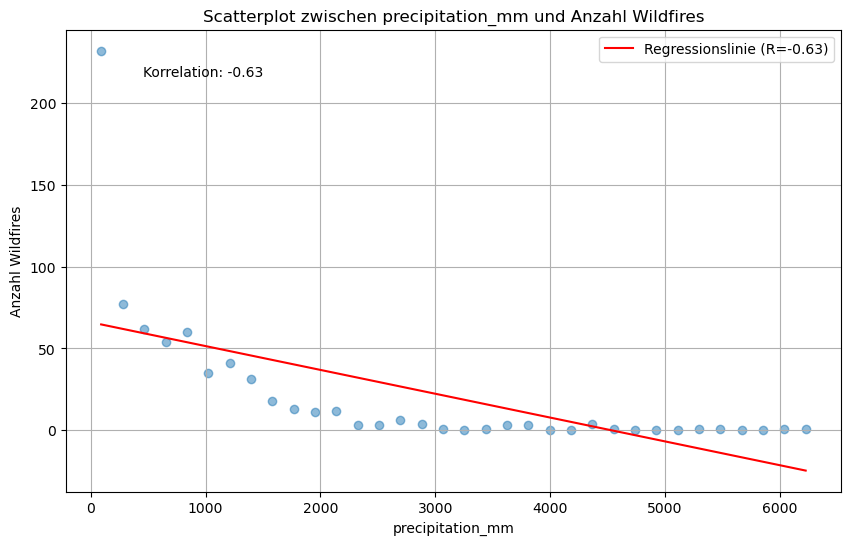

In [91]:
#Graphische Korrelationsanalyse Regenmenge & Anzahl der Wildfires

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Intervalle 
num_intervals = 34
min_value = result['precipitation_mm'].min()
max_value = result['precipitation_mm'].max()
intervals = pd.cut(result['precipitation_mm'], bins=num_intervals, precision=2, include_lowest=True)

grouped_data = result.groupby(intervals)['unique_id'].nunique().reset_index()
grouped_data['precipitation_mm'] = grouped_data['precipitation_mm'].apply(lambda x: x.mid).astype(float)

# Scatterplot 
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['precipitation_mm'], grouped_data['unique_id'], alpha=0.5)
plt.title('Scatterplot zwischen precipitation_mm und Anzahl Wildfires')
plt.xlabel('precipitation_mm')
plt.ylabel('Anzahl Wildfires')
plt.grid(True)

# Lineare Regression 
slope, intercept, r_value, p_value, std_err = linregress(grouped_data['precipitation_mm'], grouped_data['unique_id'])
regression_line = slope * grouped_data['precipitation_mm'] + intercept

# Korrelationskoeffizient 
correlation = grouped_data['precipitation_mm'].corr(grouped_data['unique_id'])
plt.text(0.1, 0.9, f'Korrelation: {correlation:.2f}', transform=plt.gca().transAxes)

# Regressionslinie 
plt.plot(grouped_data['precipitation_mm'], regression_line, color='red', label=f'Regressionslinie (R={r_value:.2f})')

plt.legend()
plt.show()

# Mit -0.63 herrscht eine moderate Korrelation zwischen Anzahl der Waldbränden und Regenmenge. 
# Je größer die Regenmenge desto weniger Wildfires 
# Ab einer moderaten Menge an Regen sinkt die Anzahl der Waldbrände

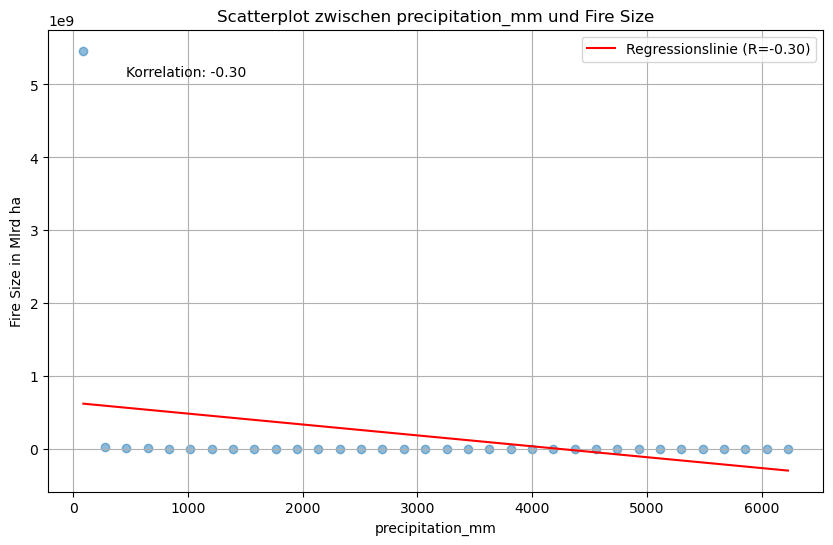

In [94]:
#Graphische Korrelationsanalyse Regenmenge & Fire Size

# Intervalle 
num_intervals = 34
min_value = result['precipitation_mm'].min()
max_value = result['precipitation_mm'].max()
intervals = pd.cut(result['precipitation_mm'], bins=num_intervals, precision=2, include_lowest=True)

grouped_data = result.groupby(intervals)['fire_size_per_day'].sum().reset_index()
grouped_data['precipitation_mm'] = grouped_data['precipitation_mm'].apply(lambda x: x.mid).astype(float)

# Scatterplot 
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['precipitation_mm'], grouped_data['fire_size_per_day'], alpha=0.5)
plt.title('Scatterplot zwischen precipitation_mm und Fire Size')
plt.xlabel('precipitation_mm')
plt.ylabel('Fire Size in Mlrd ha')
plt.grid(True)

# Lineare Regression 
slope, intercept, r_value, p_value, std_err = linregress(grouped_data['precipitation_mm'], grouped_data['fire_size_per_day'])
regression_line = slope * grouped_data['precipitation_mm'] + intercept

# Korrelationskoeffizient 
correlation = grouped_data['precipitation_mm'].corr(grouped_data['fire_size_per_day'])
plt.text(0.1, 0.9, f'Korrelation: {correlation:.2f}', transform=plt.gca().transAxes)

# Regressionslinie 
plt.plot(grouped_data['precipitation_mm'], regression_line, color='red', label=f'Regressionslinie (R={r_value:.2f})')

plt.legend()
plt.show()

# Mit -0.30 herrscht eine schwache Korrelation zwischen Fire Size Waldbrände und Regenmenge. 

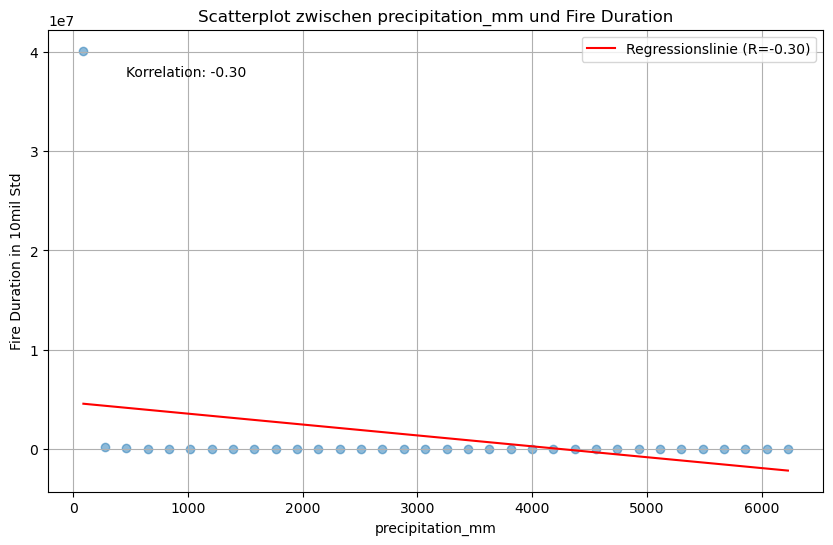

In [96]:
#Graphische Korrelationsanalyse Regenmenge & Fire Duration

# Intervalle 
num_intervals = 34
min_value = result['precipitation_mm'].min()
max_value = result['precipitation_mm'].max()
intervals = pd.cut(result['precipitation_mm'], bins=num_intervals, precision=2, include_lowest=True)

grouped_data = result.groupby(intervals)['fire_duration_per_day'].sum().reset_index()
grouped_data['precipitation_mm'] = grouped_data['precipitation_mm'].apply(lambda x: x.mid).astype(float)

# Scatterplot 
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['precipitation_mm'], grouped_data['fire_duration_per_day'], alpha=0.5)
plt.title('Scatterplot zwischen precipitation_mm und Fire Duration')
plt.xlabel('precipitation_mm')
plt.ylabel('Fire Duration in 10mil Std')
plt.grid(True)

# Lineare Regression 
slope, intercept, r_value, p_value, std_err = linregress(grouped_data['precipitation_mm'], grouped_data['fire_duration_per_day'])
regression_line = slope * grouped_data['precipitation_mm'] + intercept

# Korrelationskoeffizient 
correlation = grouped_data['precipitation_mm'].corr(grouped_data['fire_duration_per_day'])
plt.text(0.1, 0.9, f'Korrelation: {correlation:.2f}', transform=plt.gca().transAxes)

# Regressionslinie 
plt.plot(grouped_data['precipitation_mm'], regression_line, color='red', label=f'Regressionslinie (R={r_value:.2f})')

plt.legend()
plt.show()

# Mit -0.30 herrscht eine schwache Korrelation zwischen Fire Duration pro Tag und Regenmenge.


In [ ]:
Top 5 Staaten

Idaho

In [98]:
#Verteilung Anzahl der Waldbrände

# Intervalle
num_intervals = 34
min_value = result['precipitation_mm'].min()
max_value = result['precipitation_mm'].max()
idaho_data = result[result['state_name'] == 'Idaho']
intervals = pd.cut(idaho_data['precipitation_mm'], bins=num_intervals, precision=2, include_lowest=True)
grouped_data = idaho_data.groupby(intervals)['unique_id'].count().reset_index()
grouped_data.rename(columns={'unique_id': 'Anzahl_der_Waldbrände'}, inplace=True)

print("Ergebnisse für Idaho:")
print(grouped_data)

#   Ergebnisse für Idaho:
#    precipitation_mm  Anzahl_der_Waldbrände
#0     (-0.48, 13.76]                   7440
#1     (13.76, 27.53]                    173
#2     (27.53, 41.29]                     30

Ergebnisse für Idaho:
    precipitation_mm  Anzahl_der_Waldbrände
0     (-0.48, 13.76]                   7440
1     (13.76, 27.53]                    173
2     (27.53, 41.29]                     30
3     (41.29, 55.06]                     12
4     (55.06, 68.82]                      4
5     (68.82, 82.59]                      1
6     (82.59, 96.35]                      1
7    (96.35, 110.12]                      3
8   (110.12, 123.88]                      1
9   (123.88, 137.65]                      0
10  (137.65, 151.41]                      1
11  (151.41, 165.18]                      0
12  (165.18, 178.94]                      0
13  (178.94, 192.71]                      0
14  (192.71, 206.47]                      0
15  (206.47, 220.24]                      1
16   (220.24, 234.0]                      0
17   (234.0, 247.76]                      0
18  (247.76, 261.53]                      0
19  (261.53, 275.29]                      0
20  (275.29, 289.06]                      0
21  (289.0

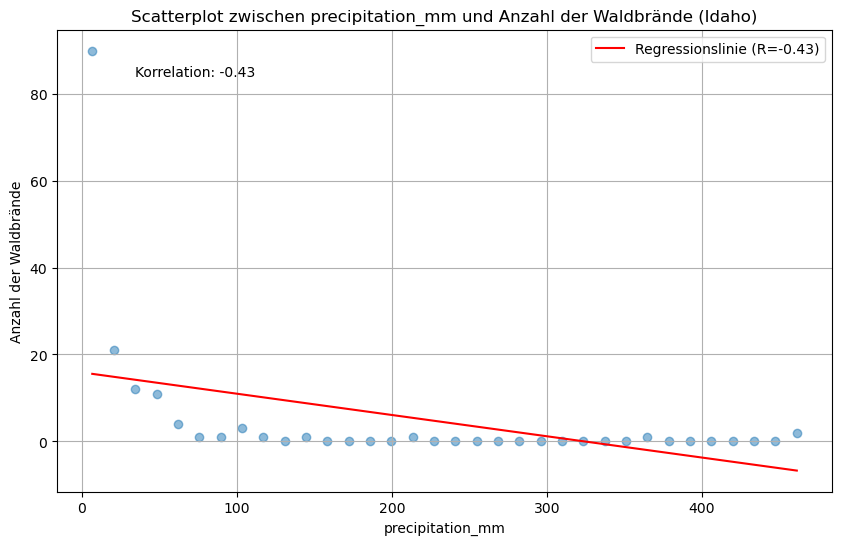

In [100]:
#Graphische Korrelationsanalyse Regenmenge & Anzahl der Wildfires

#Interval
num_intervals = 34
min_value = result['precipitation_mm'].min()
max_value = result['precipitation_mm'].max()
intervals = pd.cut(idaho_data['precipitation_mm'], bins=num_intervals, precision=2, include_lowest=True)
grouped_data = idaho_data.groupby(intervals)['unique_id'].nunique().reset_index()

# Konvertiere die "precipitation_mm"-Kategorie in numerischen Wert
grouped_data['precipitation_mm'] = grouped_data['precipitation_mm'].apply(lambda x: x.mid).astype(float)

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['precipitation_mm'], grouped_data['unique_id'], alpha=0.5)
plt.title('Scatterplot zwischen precipitation_mm und Anzahl der Waldbrände (Idaho)')
plt.xlabel('precipitation_mm')
plt.ylabel('Anzahl der Waldbrände')
plt.grid(True)

# Lineare Regression 
slope, intercept, r_value, p_value, std_err = linregress(grouped_data['precipitation_mm'], grouped_data['unique_id'])
regression_line = slope * grouped_data['precipitation_mm'] + intercept

# Korrelationskoeffizient 
correlation = grouped_data['precipitation_mm'].corr(grouped_data['unique_id'])
plt.text(0.1, 0.9, f'Korrelation: {correlation:.2f}', transform=plt.gca().transAxes)

# Regressionslinie 
plt.plot(grouped_data['precipitation_mm'], regression_line, color='red', label=f'Regressionslinie (R={r_value:.2f})')

plt.legend()
plt.show()

# Moderate Korrelation. Es ist wahrscheinlich, dass je mehr es regnet desto weniger Wildfires 
# Schon bei schwachen Regenfälle sinkt die Wahrscheinlichkeit an Waldbränden

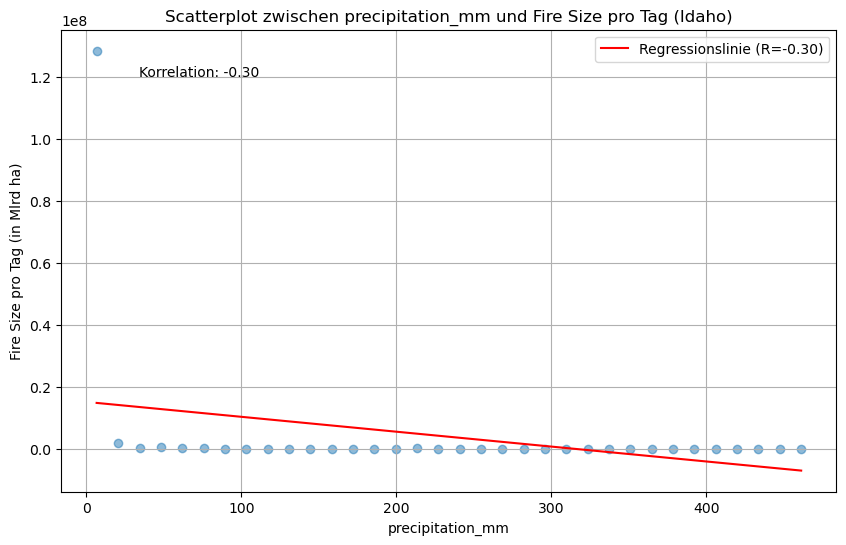

In [101]:
#Graphische Korrelationsanalyse Regenmenge & Fire Size

# Interval
num_intervals = 34
min_value = result['precipitation_mm'].min()
max_value = result['precipitation_mm'].max()
intervals = pd.cut(idaho_data['precipitation_mm'], bins=num_intervals, precision=2, include_lowest=True)
grouped_data = idaho_data.groupby(intervals)['fire_size_per_day'].sum().reset_index()

# Konvertiere die "precipitation_mm"-Kategorie in numerischen Wert
grouped_data['precipitation_mm'] = grouped_data['precipitation_mm'].apply(lambda x: x.mid).astype(float)

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['precipitation_mm'], grouped_data['fire_size_per_day'], alpha=0.5)
plt.title('Scatterplot zwischen precipitation_mm und Fire Size pro Tag (Idaho)')
plt.xlabel('precipitation_mm')
plt.ylabel('Fire Size pro Tag (in Mlrd ha)')
plt.grid(True)

# Lineare Regression 
slope, intercept, r_value, p_value, std_err = linregress(grouped_data['precipitation_mm'], grouped_data['fire_size_per_day'])
regression_line = slope * grouped_data['precipitation_mm'] + intercept

# Korrelationskoeffizient 
correlation = grouped_data['precipitation_mm'].corr(grouped_data['fire_size_per_day'])
plt.text(0.1, 0.9, f'Korrelation: {correlation:.2f}', transform=plt.gca().transAxes)

# Regressionslinie 
plt.plot(grouped_data['precipitation_mm'], regression_line, color='red', label=f'Regressionslinie (R={r_value:.2f})')

plt.legend()
plt.show()

# -0.30 Korrelation

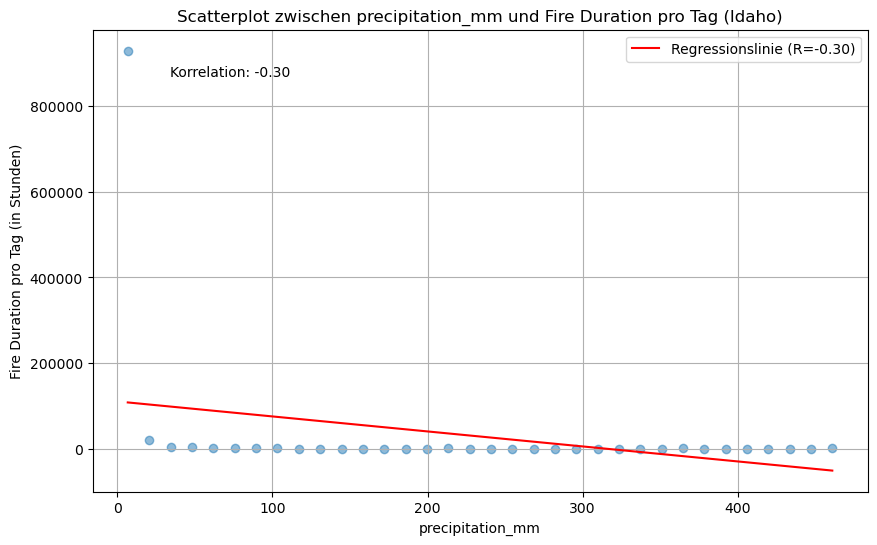

In [102]:
#Graphische Korrelationsanalyse Regenmenge & Fire Duration

# Interval
num_intervals = 34
min_value = result['precipitation_mm'].min()
max_value = result['precipitation_mm'].max()
intervals = pd.cut(idaho_data['precipitation_mm'], bins=num_intervals, precision=2, include_lowest=True)
grouped_data = idaho_data.groupby(intervals)['fire_duration_per_day'].sum().reset_index()

# Konvertiere die "precipitation_mm"-Kategorie in numerischen Wert
grouped_data['precipitation_mm'] = grouped_data['precipitation_mm'].apply(lambda x: x.mid).astype(float)

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['precipitation_mm'], grouped_data['fire_duration_per_day'], alpha=0.5)
plt.title('Scatterplot zwischen precipitation_mm und Fire Duration pro Tag (Idaho)')
plt.xlabel('precipitation_mm')
plt.ylabel('Fire Duration pro Tag (in Stunden)')
plt.grid(True)

# Lineare Regression 
slope, intercept, r_value, p_value, std_err = linregress(grouped_data['precipitation_mm'], grouped_data['fire_duration_per_day'])
regression_line = slope * grouped_data['precipitation_mm'] + intercept

# Korrelationskoeffizient 
correlation = grouped_data['precipitation_mm'].corr(grouped_data['fire_duration_per_day'])
plt.text(0.1, 0.9, f'Korrelation: {correlation:.2f}', transform=plt.gca().transAxes)

# Regressionslinie 
plt.plot(grouped_data['precipitation_mm'], regression_line, color='red', label=f'Regressionslinie (R={r_value:.2f})')

plt.legend()
plt.show()

# -0.30 Korrelation


oregon

In [103]:
# Intervalle
num_intervals = 34
min_value = result['precipitation_mm'].min()
max_value = result['precipitation_mm'].max()
oregon_data = result[result['state_name'] == 'Oregon'] 
intervals = pd.cut(oregon_data['precipitation_mm'], bins=num_intervals, precision=2, include_lowest=True)
grouped_data = oregon_data.groupby(intervals)['unique_id'].count().reset_index()  
grouped_data.rename(columns={'unique_id': 'Anzahl_der_Waldbrände'}, inplace=True)

print("Ergebnisse für Oregon:")  

#Ergebnisse für Oregon:
#    precipitation_mm  Anzahl_der_Waldbrände
#0      (-0.31, 8.94]                   6713
#1      (8.94, 17.88]                    549
#2     (17.88, 26.82]                    219

Ergebnisse für Oregon:
    precipitation_mm  Anzahl_der_Waldbrände
0      (-0.31, 8.94]                   6713
1      (8.94, 17.88]                    549
2     (17.88, 26.82]                    219
3     (26.82, 35.76]                     90
4     (35.76, 44.71]                     39
5     (44.71, 53.65]                     23
6     (53.65, 62.59]                     18
7     (62.59, 71.53]                      4
8     (71.53, 80.47]                      6
9     (80.47, 89.41]                      2
10    (89.41, 98.35]                      0
11   (98.35, 107.29]                      3
12  (107.29, 116.24]                      0
13  (116.24, 125.18]                      0
14  (125.18, 134.12]                      0
15  (134.12, 143.06]                      2
16   (143.06, 152.0]                      0
17   (152.0, 160.94]                      0
18  (160.94, 169.88]                      0
19  (169.88, 178.82]                      0
20  (178.82, 187.76]                      1
21  (187.

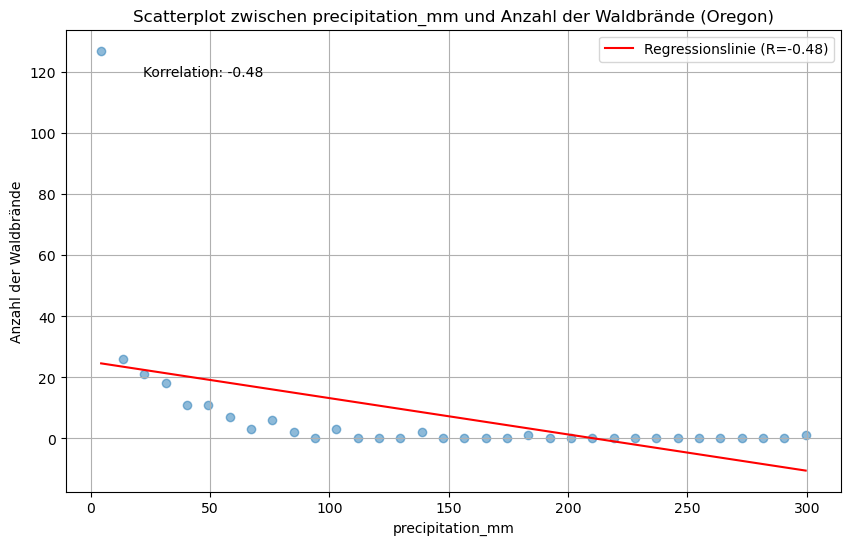

In [104]:
# Intervalle
num_intervals = 34
min_value = result['precipitation_mm'].min()
max_value = result['precipitation_mm'].max()
oregon_data = result[result['state_name'] == 'Oregon']  # Hier ändert sich Idaho zu Oregon
intervals = pd.cut(oregon_data['precipitation_mm'], bins=num_intervals, precision=2, include_lowest=True)
grouped_data = oregon_data.groupby(intervals)['unique_id'].nunique().reset_index()  # Hier ändert sich Idaho zu Oregon

# Konvertiere die "precipitation_mm"-Kategorie in numerischen Wert
grouped_data['precipitation_mm'] = grouped_data['precipitation_mm'].apply(lambda x: x.mid).astype(float)

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['precipitation_mm'], grouped_data['unique_id'], alpha=0.5)
plt.title('Scatterplot zwischen precipitation_mm und Anzahl der Waldbrände (Oregon)')
plt.xlabel('precipitation_mm')
plt.ylabel('Anzahl der Waldbrände')
plt.grid(True)

# Lineare Regression 
slope, intercept, r_value, p_value, std_err = linregress(grouped_data['precipitation_mm'], grouped_data['unique_id'])
regression_line = slope * grouped_data['precipitation_mm'] + intercept

# Korrelationskoeffizient 
correlation = grouped_data['precipitation_mm'].corr(grouped_data['unique_id'])
plt.text(0.1, 0.9, f'Korrelation: {correlation:.2f}', transform=plt.gca().transAxes)

# Regressionslinie 
plt.plot(grouped_data['precipitation_mm'], regression_line, color='red', label=f'Regressionslinie (R={r_value:.2f})')

plt.legend()
plt.show()

# Moderate Korrelation. Es ist wahrscheinlich, dass je mehr es regnet, desto weniger Waldbrände in Oregon auftreten.
# Schon bei sehr schwachen Regenfälle sinkt die Wahrscheinlichkeit an Waldbränden


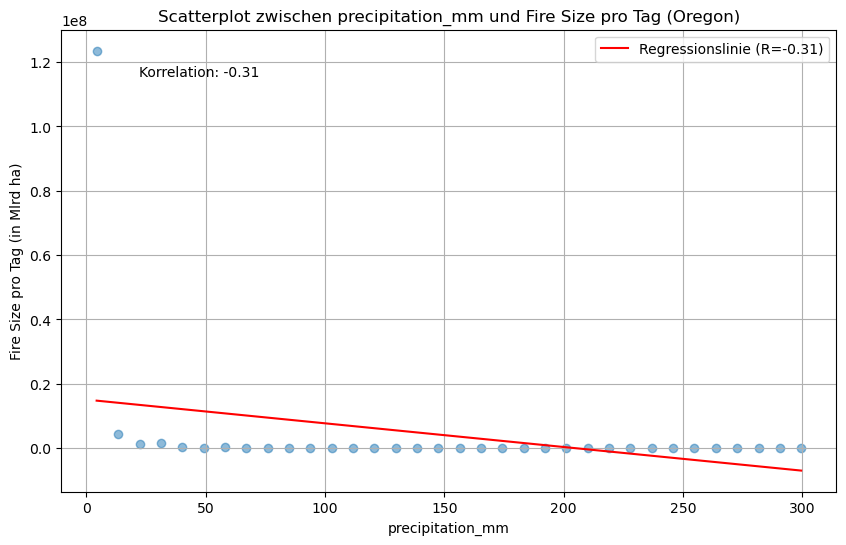

In [105]:
# Interval
num_intervals = 34
min_value = result['precipitation_mm'].min()
max_value = result['precipitation_mm'].max()
intervals = pd.cut(oregon_data['precipitation_mm'], bins=num_intervals, precision=2, include_lowest=True)  # Hier ändert sich idaho_data zu oregon_data
grouped_data = oregon_data.groupby(intervals)['fire_size_per_day'].sum().reset_index()  # Hier ändert sich idaho_data zu oregon_data

# Konvertiere die "precipitation_mm"-Kategorie in numerischen Wert
grouped_data['precipitation_mm'] = grouped_data['precipitation_mm'].apply(lambda x: x.mid).astype(float)

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['precipitation_mm'], grouped_data['fire_size_per_day'], alpha=0.5)
plt.title('Scatterplot zwischen precipitation_mm und Fire Size pro Tag (Oregon)')  # Hier ändert sich Idaho zu Oregon
plt.xlabel('precipitation_mm')
plt.ylabel('Fire Size pro Tag (in Mlrd ha)')
plt.grid(True)

# Lineare Regression 
slope, intercept, r_value, p_value, std_err = linregress(grouped_data['precipitation_mm'], grouped_data['fire_size_per_day'])
regression_line = slope * grouped_data['precipitation_mm'] + intercept

# Korrelationskoeffizient 
correlation = grouped_data['precipitation_mm'].corr(grouped_data['fire_size_per_day'])
plt.text(0.1, 0.9, f'Korrelation: {correlation:.2f}', transform=plt.gca().transAxes)

# Regressionslinie 
plt.plot(grouped_data['precipitation_mm'], regression_line, color='red', label=f'Regressionslinie (R={r_value:.2f})')

plt.legend()
plt.show()

# -0.31 Korrelation


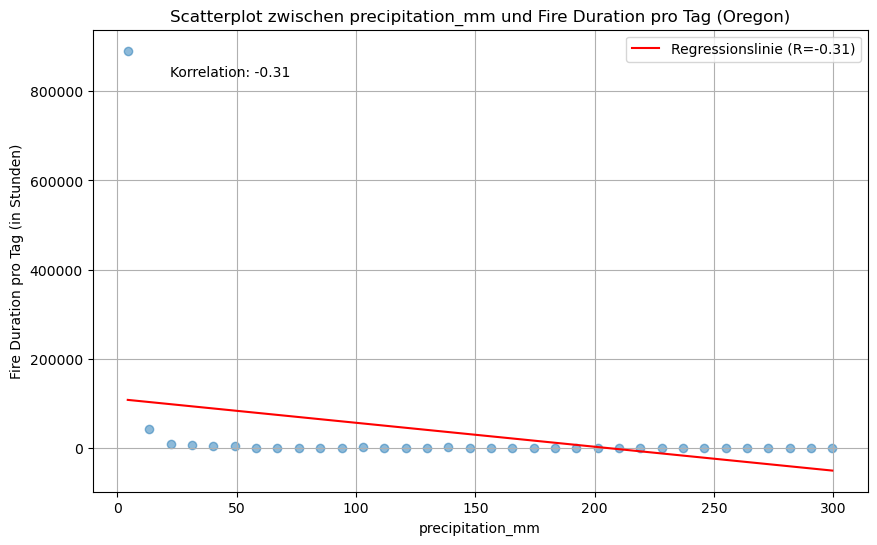

In [106]:
# Interval
num_intervals = 34
min_value = result['precipitation_mm'].min()
max_value = result['precipitation_mm'].max()
intervals = pd.cut(oregon_data['precipitation_mm'], bins=num_intervals, precision=2, include_lowest=True)  # Hier ändert sich idaho_data zu oregon_data
grouped_data = oregon_data.groupby(intervals)['fire_duration_per_day'].sum().reset_index()  # Hier ändert sich idaho_data zu oregon_data

# Konvertiere die "precipitation_mm"-Kategorie in numerischen Wert
grouped_data['precipitation_mm'] = grouped_data['precipitation_mm'].apply(lambda x: x.mid).astype(float)

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['precipitation_mm'], grouped_data['fire_duration_per_day'], alpha=0.5)
plt.title('Scatterplot zwischen precipitation_mm und Fire Duration pro Tag (Oregon)')  # Hier ändert sich Idaho zu Oregon
plt.xlabel('precipitation_mm')
plt.ylabel('Fire Duration pro Tag (in Stunden)')
plt.grid(True)

# Lineare Regression 
slope, intercept, r_value, p_value, std_err = linregress(grouped_data['precipitation_mm'], grouped_data['fire_duration_per_day'])
regression_line = slope * grouped_data['precipitation_mm'] + intercept

# Korrelationskoeffizient 
correlation = grouped_data['precipitation_mm'].corr(grouped_data['fire_duration_per_day'])
plt.text(0.1, 0.9, f'Korrelation: {correlation:.2f}', transform=plt.gca().transAxes)

# Regressionslinie 
plt.plot(grouped_data['precipitation_mm'], regression_line, color='red', label=f'Regressionslinie (R={r_value:.2f})')

plt.legend()
plt.show()

# -0.31 Korrelation


In [ ]:
California

In [107]:
# Intervalle
num_intervals = 34
min_value = result['precipitation_mm'].min()
max_value = result['precipitation_mm'].max()
california_data = result[result['state_name'] == 'California']  
intervals = pd.cut(california_data['precipitation_mm'], bins=num_intervals, precision=2, include_lowest=True)
grouped_data = california_data.groupby(intervals)['unique_id'].count().reset_index()  #
grouped_data.rename(columns={'unique_id': 'Anzahl_der_Waldbrände'}, inplace=True)

print("Ergebnisse für California:")  
print(grouped_data)

#Ergebnisse für California:
#      precipitation_mm  Anzahl_der_Waldbrände
#0       (-1.15, 33.47]                   6692
#1       (33.47, 66.94]                    497
#2      (66.94, 100.41]                    218

Ergebnisse für California:
      precipitation_mm  Anzahl_der_Waldbrände
0       (-1.15, 33.47]                   6692
1       (33.47, 66.94]                    497
2      (66.94, 100.41]                    218
3     (100.41, 133.88]                    103
4     (133.88, 167.35]                     48
5     (167.35, 200.82]                     37
6     (200.82, 234.29]                     15
7     (234.29, 267.76]                     18
8     (267.76, 301.24]                     11
9     (301.24, 334.71]                      6
10    (334.71, 368.18]                      7
11    (368.18, 401.65]                      5
12    (401.65, 435.12]                      3
13    (435.12, 468.59]                      1
14    (468.59, 502.06]                      1
15    (502.06, 535.53]                      1
16     (535.53, 569.0]                      0
17     (569.0, 602.47]                      1
18    (602.47, 635.94]                      1
19    (635.94, 669.41]                      0
20    (

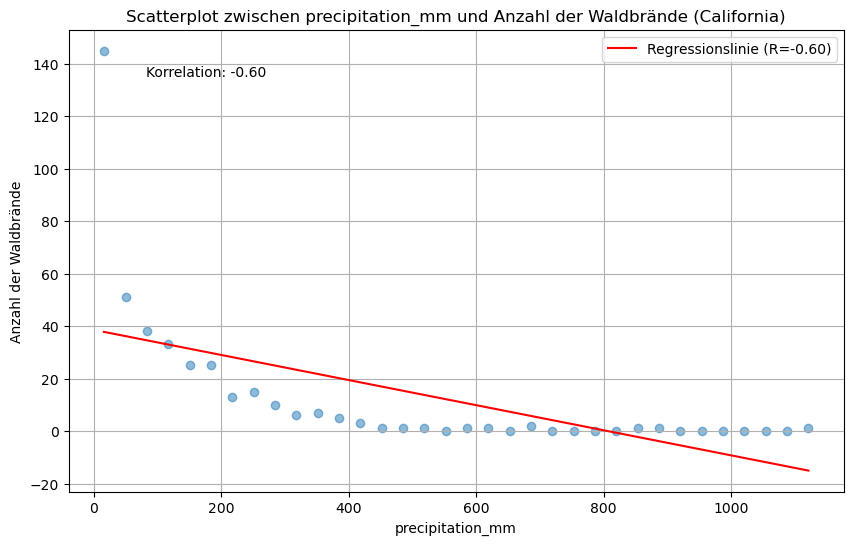

In [108]:
# Interval
num_intervals = 34
min_value = result['precipitation_mm'].min()
max_value = result['precipitation_mm'].max()
california_data = result[result['state_name'] == 'California']  # Hier ändert sich Oregon zu California
intervals = pd.cut(california_data['precipitation_mm'], bins=num_intervals, precision=2, include_lowest=True)
grouped_data = california_data.groupby(intervals)['unique_id'].nunique().reset_index()  # Hier ändert sich Oregon zu California

# Konvertiere die "precipitation_mm"-Kategorie in numerischen Wert
grouped_data['precipitation_mm'] = grouped_data['precipitation_mm'].apply(lambda x: x.mid).astype(float)

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['precipitation_mm'], grouped_data['unique_id'], alpha=0.5)
plt.title('Scatterplot zwischen precipitation_mm und Anzahl der Waldbrände (California)')  # Hier ändert sich Oregon zu California
plt.xlabel('precipitation_mm')
plt.ylabel('Anzahl der Waldbrände')
plt.grid(True)

# Lineare Regression 
slope, intercept, r_value, p_value, std_err = linregress(grouped_data['precipitation_mm'], grouped_data['unique_id'])
regression_line = slope * grouped_data['precipitation_mm'] + intercept

# Korrelationskoeffizient 
correlation = grouped_data['precipitation_mm'].corr(grouped_data['unique_id'])
plt.text(0.1, 0.9, f'Korrelation: {correlation:.2f}', transform=plt.gca().transAxes)

# Regressionslinie 
plt.plot(grouped_data['precipitation_mm'], regression_line, color='red', label=f'Regressionslinie (R={r_value:.2f})')

plt.legend()
plt.show()

# Moderate Korrelation. Es ist wahrscheinlich, dass je mehr es regnet, desto weniger Waldbrände in California auftreten.
# Schon bei schwachen Regenfälle sinkt die Wahrscheinlichkeit an Waldbränden


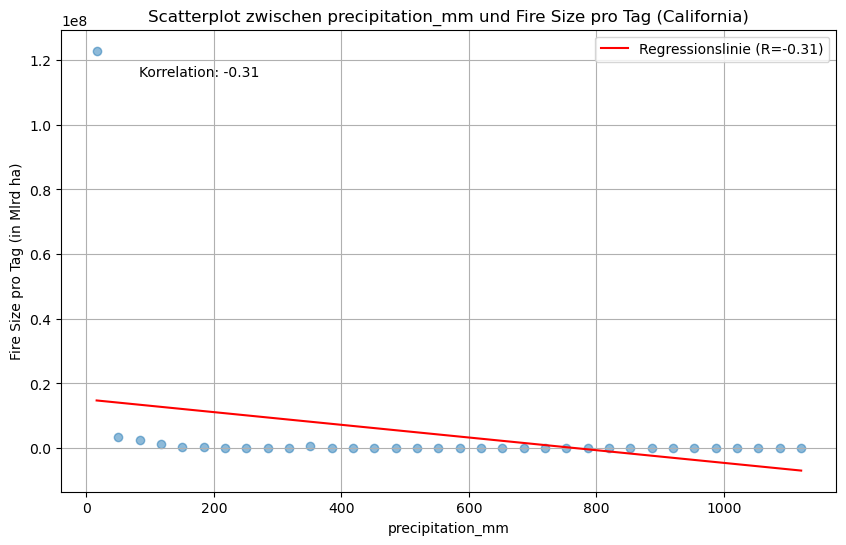

In [109]:
# Interval
num_intervals = 34
min_value = result['precipitation_mm'].min()
max_value = result['precipitation_mm'].max()
intervals = pd.cut(california_data['precipitation_mm'], bins=num_intervals, precision=2, include_lowest=True)  # Hier ändert sich oregon_data zu california_data
grouped_data = california_data.groupby(intervals)['fire_size_per_day'].sum().reset_index()  # Hier ändert sich oregon_data zu california_data

# Konvertiere die "precipitation_mm"-Kategorie in numerischen Wert
grouped_data['precipitation_mm'] = grouped_data['precipitation_mm'].apply(lambda x: x.mid).astype(float)

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['precipitation_mm'], grouped_data['fire_size_per_day'], alpha=0.5)
plt.title('Scatterplot zwischen precipitation_mm und Fire Size pro Tag (California)')  # Hier ändert sich Oregon zu California
plt.xlabel('precipitation_mm')
plt.ylabel('Fire Size pro Tag (in Mlrd ha)')
plt.grid(True)

# Lineare Regression 
slope, intercept, r_value, p_value, std_err = linregress(grouped_data['precipitation_mm'], grouped_data['fire_size_per_day'])
regression_line = slope * grouped_data['precipitation_mm'] + intercept

# Korrelationskoeffizient 
correlation = grouped_data['precipitation_mm'].corr(grouped_data['fire_size_per_day'])
plt.text(0.1, 0.9, f'Korrelation: {correlation:.2f}', transform=plt.gca().transAxes)

# Regressionslinie 
plt.plot(grouped_data['precipitation_mm'], regression_line, color='red', label=f'Regressionslinie (R={r_value:.2f})')

plt.legend()
plt.show()

# -0.31 Korrelation


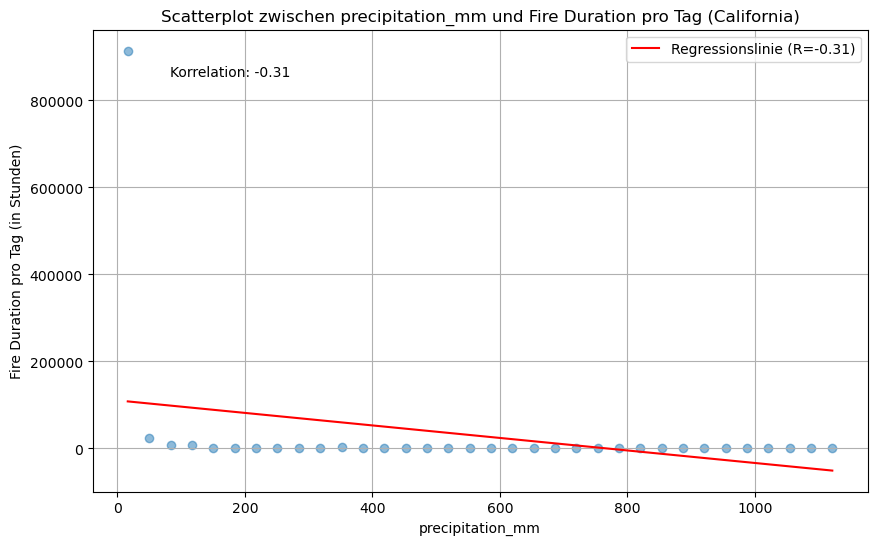

In [110]:
# Interval
num_intervals = 34
min_value = result['precipitation_mm'].min()
max_value = result['precipitation_mm'].max()
intervals = pd.cut(california_data['precipitation_mm'], bins=num_intervals, precision=2, include_lowest=True)  # Hier ändert sich oregon_data zu california_data
grouped_data = california_data.groupby(intervals)['fire_duration_per_day'].sum().reset_index()  # Hier ändert sich oregon_data zu california_data

# Konvertiere die "precipitation_mm"-Kategorie in numerischen Wert
grouped_data['precipitation_mm'] = grouped_data['precipitation_mm'].apply(lambda x: x.mid).astype(float)

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['precipitation_mm'], grouped_data['fire_duration_per_day'], alpha=0.5)
plt.title('Scatterplot zwischen precipitation_mm und Fire Duration pro Tag (California)')  # Hier ändert sich Oregon zu California
plt.xlabel('precipitation_mm')
plt.ylabel('Fire Duration pro Tag (in Stunden)')
plt.grid(True)

# Lineare Regression 
slope, intercept, r_value, p_value, std_err = linregress(grouped_data['precipitation_mm'], grouped_data['fire_duration_per_day'])
regression_line = slope * grouped_data['precipitation_mm'] + intercept

# Korrelationskoeffizient 
correlation = grouped_data['precipitation_mm'].corr(grouped_data['fire_duration_per_day'])
plt.text(0.1, 0.9, f'Korrelation: {correlation:.2f}', transform=plt.gca().transAxes)

# Regressionslinie 
plt.plot(grouped_data['precipitation_mm'], regression_line, color='red', label=f'Regressionslinie (R={r_value:.2f})')

plt.legend()
plt.show()

# -0.31 Korrelation


Arizona

In [111]:
# Intervalle
num_intervals = 34
min_value = result['precipitation_mm'].min()
max_value = result['precipitation_mm'].max()
arizona_data = result[result['state_name'] == 'Arizona']  # Hier ändert sich "California" zu "Arizona"
intervals = pd.cut(arizona_data['precipitation_mm'], bins=num_intervals, precision=2, include_lowest=True)
grouped_data = arizona_data.groupby(intervals)['unique_id'].count().reset_index()
grouped_data.rename(columns={'unique_id': 'Anzahl_der_Waldbrände'}, inplace=True)

print("Ergebnisse für Arizona:")  
print(grouped_data)

#Ergebnisse für Arizona:
#    precipitation_mm  Anzahl_der_Waldbrände
#0      (-0.19, 5.44]                   7456
#1      (5.44, 10.87]                    105
#2     (10.87, 16.31]                     49

Ergebnisse für Arizona:
    precipitation_mm  Anzahl_der_Waldbrände
0      (-0.19, 5.44]                   7456
1      (5.44, 10.87]                    105
2     (10.87, 16.31]                     49
3     (16.31, 21.74]                     23
4     (21.74, 27.18]                     14
5     (27.18, 32.61]                      6
6     (32.61, 38.05]                      8
7     (38.05, 43.48]                      4
8     (43.48, 48.92]                      0
9     (48.92, 54.35]                      1
10    (54.35, 59.79]                      0
11    (59.79, 65.22]                      1
12    (65.22, 70.66]                      0
13    (70.66, 76.09]                      1
14    (76.09, 81.53]                      0
15    (81.53, 86.96]                      1
16     (86.96, 92.4]                      0
17     (92.4, 97.84]                      0
18   (97.84, 103.27]                      0
19  (103.27, 108.71]                      0
20  (108.71, 114.14]                      0
21  (114

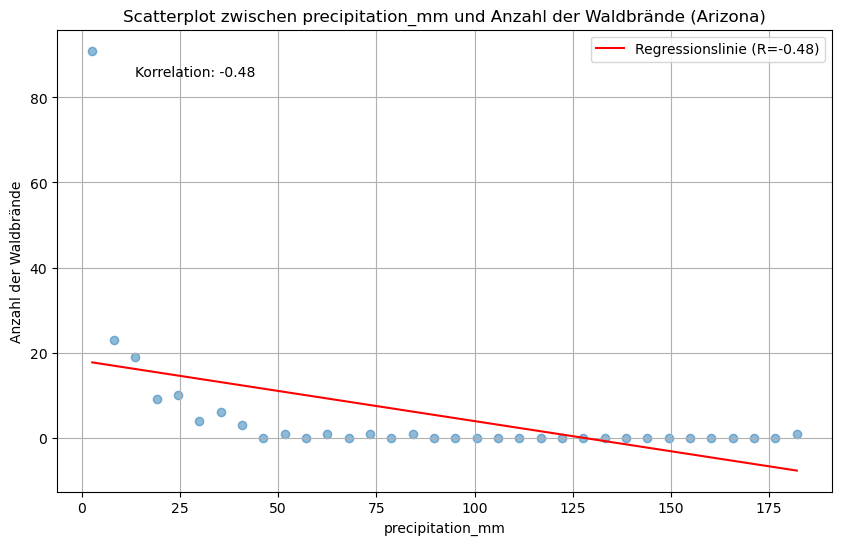

In [112]:
# Interval
num_intervals = 34
min_value = result['precipitation_mm'].min()
max_value = result['precipitation_mm'].max()
arizona_data = result[result['state_name'] == 'Arizona']  # Hier ändert sich "California" zu "Arizona"
intervals = pd.cut(arizona_data['precipitation_mm'], bins=num_intervals, precision=2, include_lowest=True)
grouped_data = arizona_data.groupby(intervals)['unique_id'].nunique().reset_index()  # Hier ändert sich "California" zu "Arizona"

# Konvertiere die "precipitation_mm"-Kategorie in numerischen Wert
grouped_data['precipitation_mm'] = grouped_data['precipitation_mm'].apply(lambda x: x.mid).astype(float)

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['precipitation_mm'], grouped_data['unique_id'], alpha=0.5)
plt.title('Scatterplot zwischen precipitation_mm und Anzahl der Waldbrände (Arizona)')  # Hier ändert sich "California" zu "Arizona"
plt.xlabel('precipitation_mm')
plt.ylabel('Anzahl der Waldbrände')
plt.grid(True)

# Lineare Regression 
slope, intercept, r_value, p_value, std_err = linregress(grouped_data['precipitation_mm'], grouped_data['unique_id'])
regression_line = slope * grouped_data['precipitation_mm'] + intercept

# Korrelationskoeffizient 
correlation = grouped_data['precipitation_mm'].corr(grouped_data['unique_id'])
plt.text(0.1, 0.9, f'Korrelation: {correlation:.2f}', transform=plt.gca().transAxes)

# Regressionslinie 
plt.plot(grouped_data['precipitation_mm'], regression_line, color='red', label=f'Regressionslinie (R={r_value:.2f})')

plt.legend()
plt.show()

# Moderate Korrelation. Es ist wahrscheinlich, dass je mehr es regnet, desto weniger Waldbrände in Arizona auftreten.
# Schon bei sehr schwachen Regenfälle sinkt die Wahrscheinlichkeit an Waldbränden


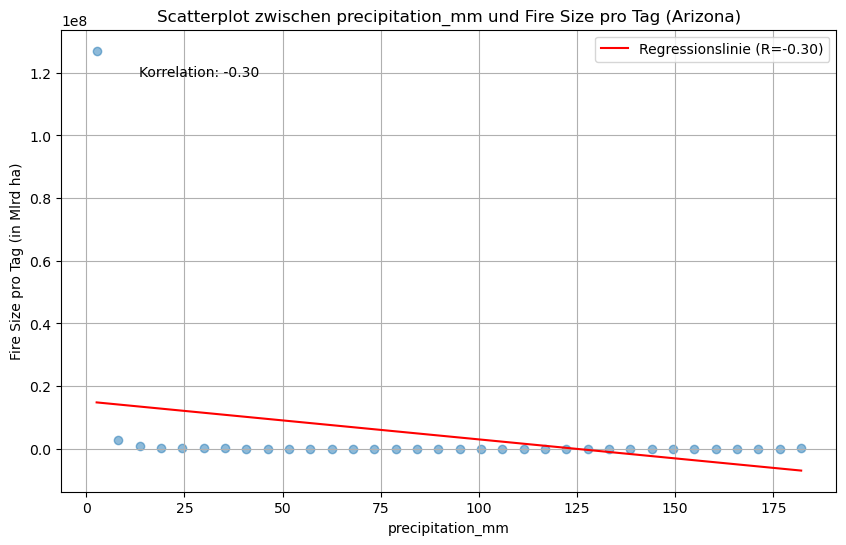

In [113]:
# Interval
num_intervals = 34
min_value = result['precipitation_mm'].min()
max_value = result['precipitation_mm'].max()
arizona_data = result[result['state_name'] == 'Arizona']  # Hier ändert sich "California" zu "Arizona"
intervals = pd.cut(arizona_data['precipitation_mm'], bins=num_intervals, precision=2, include_lowest=True)
grouped_data = arizona_data.groupby(intervals)['fire_size_per_day'].sum().reset_index()  # Hier ändert sich "California" zu "Arizona"

# Konvertiere die "precipitation_mm"-Kategorie in numerischen Wert
grouped_data['precipitation_mm'] = grouped_data['precipitation_mm'].apply(lambda x: x.mid).astype(float)

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['precipitation_mm'], grouped_data['fire_size_per_day'], alpha=0.5)
plt.title('Scatterplot zwischen precipitation_mm und Fire Size pro Tag (Arizona)')  # Hier ändert sich "California" zu "Arizona"
plt.xlabel('precipitation_mm')
plt.ylabel('Fire Size pro Tag (in Mlrd ha)')
plt.grid(True)

# Lineare Regression 
slope, intercept, r_value, p_value, std_err = linregress(grouped_data['precipitation_mm'], grouped_data['fire_size_per_day'])
regression_line = slope * grouped_data['precipitation_mm'] + intercept

# Korrelationskoeffizient 
correlation = grouped_data['precipitation_mm'].corr(grouped_data['fire_size_per_day'])
plt.text(0.1, 0.9, f'Korrelation: {correlation:.2f}', transform=plt.gca().transAxes)

# Regressionslinie 
plt.plot(grouped_data['precipitation_mm'], regression_line, color='red', label=f'Regressionslinie (R={r_value:.2f})')

plt.legend()
plt.show()

# -0.30 Korrelation


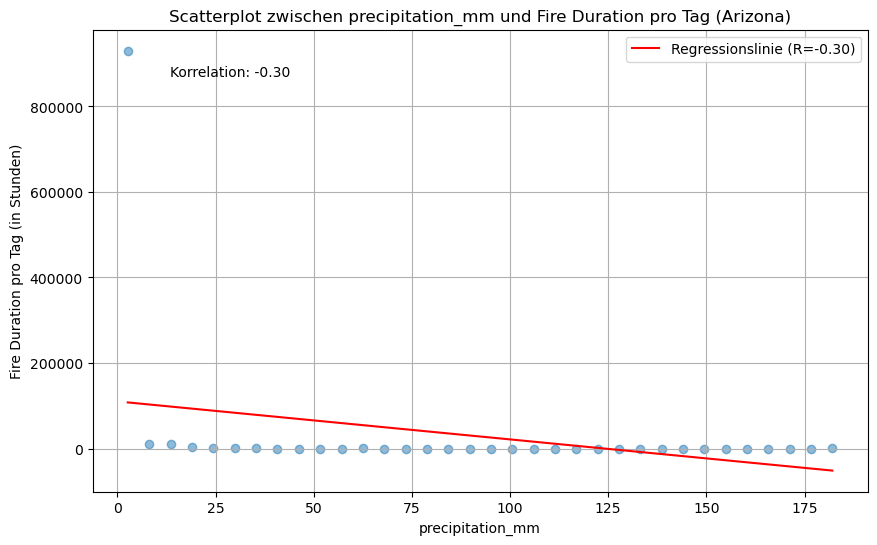

In [114]:
# Interval
num_intervals = 34
min_value = result['precipitation_mm'].min()
max_value = result['precipitation_mm'].max()
arizona_data = result[result['state_name'] == 'Arizona']  # Hier ändert sich "California" zu "Arizona"
intervals = pd.cut(arizona_data['precipitation_mm'], bins=num_intervals, precision=2, include_lowest=True)
grouped_data = arizona_data.groupby(intervals)['fire_duration_per_day'].sum().reset_index()  # Hier ändert sich "California" zu "Arizona"

# Konvertiere die "precipitation_mm"-Kategorie in numerischen Wert
grouped_data['precipitation_mm'] = grouped_data['precipitation_mm'].apply(lambda x: x.mid).astype(float)

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['precipitation_mm'], grouped_data['fire_duration_per_day'], alpha=0.5)
plt.title('Scatterplot zwischen precipitation_mm und Fire Duration pro Tag (Arizona)')  # Hier ändert sich "California" zu "Arizona"
plt.xlabel('precipitation_mm')
plt.ylabel('Fire Duration pro Tag (in Stunden)')
plt.grid(True)

# Lineare Regression 
slope, intercept, r_value, p_value, std_err = linregress(grouped_data['precipitation_mm'], grouped_data['fire_duration_per_day'])
regression_line = slope * grouped_data['precipitation_mm'] + intercept

# Korrelationskoeffizient 
correlation = grouped_data['precipitation_mm'].corr(grouped_data['fire_duration_per_day'])
plt.text(0.1, 0.9, f'Korrelation: {correlation:.2f}', transform=plt.gca().transAxes)

# Regressionslinie 
plt.plot(grouped_data['precipitation_mm'], regression_line, color='red', label=f'Regressionslinie (R={r_value:.2f})')

plt.legend()
plt.show()

# -0.30 Korrelation


New Mexico

In [115]:
# Intervalle
num_intervals = 34
min_value = result['precipitation_mm'].min()
max_value = result['precipitation_mm'].max()
new_mexico_data = result[result['state_name'] == 'New Mexico']  # Hier ändert sich "Arizona" zu "New Mexico"
intervals = pd.cut(new_mexico_data['precipitation_mm'], bins=num_intervals, precision=2, include_lowest=True)
grouped_data = new_mexico_data.groupby(intervals)['unique_id'].count().reset_index()
grouped_data.rename(columns={'unique_id': 'Anzahl_der_Waldbrände'}, inplace=True)

print("Ergebnisse für New Mexico:")
print(grouped_data)

#Ergebnisse für New Mexico:
#                precipitation_mm  Anzahl_der_Waldbrände
#0   (-0.15000000000000002, 4.12]                   7273
#1                   (4.12, 8.24]                    176
#2                  (8.24, 12.35]                     80
#3                 (12.35, 16.47]                     59

Ergebnisse für New Mexico:
                precipitation_mm  Anzahl_der_Waldbrände
0   (-0.15000000000000002, 4.12]                   7273
1                   (4.12, 8.24]                    176
2                  (8.24, 12.35]                     80
3                 (12.35, 16.47]                     59
4                 (16.47, 20.59]                     28
5                 (20.59, 24.71]                     11
6                 (24.71, 28.82]                     10
7                 (28.82, 32.94]                      9
8                 (32.94, 37.06]                      6
9                 (37.06, 41.18]                      2
10                (41.18, 45.29]                      3
11                (45.29, 49.41]                      2
12                (49.41, 53.53]                      3
13                (53.53, 57.65]                      0
14                (57.65, 61.76]                      1
15                (61.76, 65.88]                      0
16                 (6

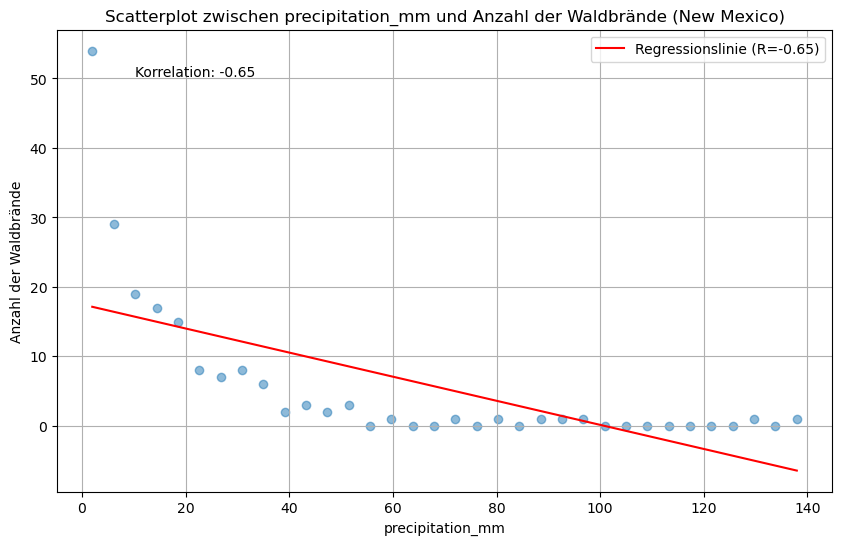

In [116]:
# Intervalle
num_intervals = 34
min_value = result['precipitation_mm'].min()
max_value = result['precipitation_mm'].max()
new_mexico_data = result[result['state_name'] == 'New Mexico']  # Hier ändert sich "Arizona" zu "New Mexico"
intervals = pd.cut(new_mexico_data['precipitation_mm'], bins=num_intervals, precision=2, include_lowest=True)
grouped_data = new_mexico_data.groupby(intervals)['unique_id'].nunique().reset_index()  # Hier ändert sich "Arizona" zu "New Mexico"

# Konvertiere die "precipitation_mm"-Kategorie in numerischen Wert
grouped_data['precipitation_mm'] = grouped_data['precipitation_mm'].apply(lambda x: x.mid).astype(float)

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['precipitation_mm'], grouped_data['unique_id'], alpha=0.5)
plt.title('Scatterplot zwischen precipitation_mm und Anzahl der Waldbrände (New Mexico)')  # Hier ändert sich "Arizona" zu "New Mexico"
plt.xlabel('precipitation_mm')
plt.ylabel('Anzahl der Waldbrände')
plt.grid(True)

# Lineare Regression
slope, intercept, r_value, p_value, std_err = linregress(grouped_data['precipitation_mm'], grouped_data['unique_id'])
regression_line = slope * grouped_data['precipitation_mm'] + intercept

# Korrelationskoeffizient
correlation = grouped_data['precipitation_mm'].corr(grouped_data['unique_id'])
plt.text(0.1, 0.9, f'Korrelation: {correlation:.2f}', transform=plt.gca().transAxes)

# Regressionslinie
plt.plot(grouped_data['precipitation_mm'], regression_line, color='red', label=f'Regressionslinie (R={r_value:.2f})')

plt.legend()
plt.show()

# Moderate Korrelation. Es ist wahrscheinlich, dass je mehr es regnet, desto weniger Waldbrände in New Mexico auftreten.
# Schon bei sehr schwachen Regenfälle sinkt die Wahrscheinlichkeit an Waldbränden


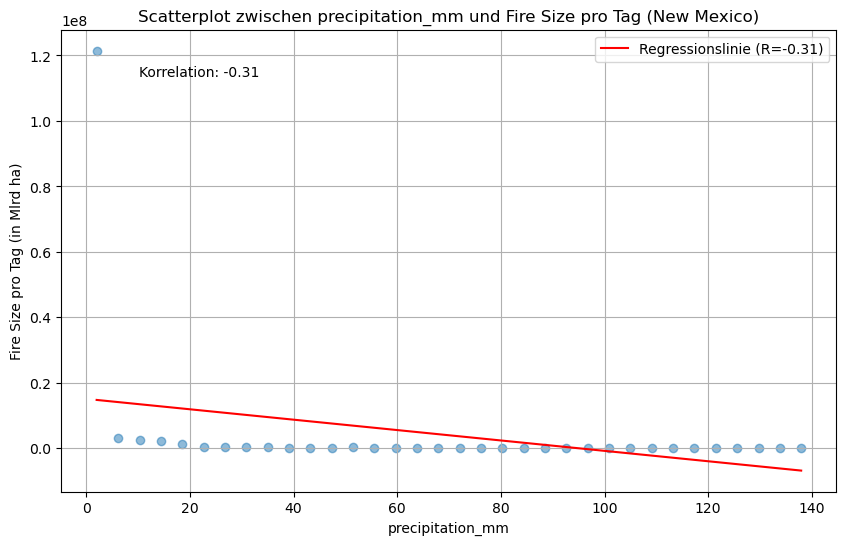

In [117]:
# Intervalle
num_intervals = 34
min_value = result['precipitation_mm'].min()
max_value = result['precipitation_mm'].max()
new_mexico_data = result[result['state_name'] == 'New Mexico']  # Hier ändert sich "Arizona" zu "New Mexico"
intervals = pd.cut(new_mexico_data['precipitation_mm'], bins=num_intervals, precision=2, include_lowest=True)
grouped_data = new_mexico_data.groupby(intervals)['fire_size_per_day'].sum().reset_index()  # Hier ändert sich "Arizona" zu "New Mexico"

# Konvertiere die "precipitation_mm"-Kategorie in numerischen Wert
grouped_data['precipitation_mm'] = grouped_data['precipitation_mm'].apply(lambda x: x.mid).astype(float)

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['precipitation_mm'], grouped_data['fire_size_per_day'], alpha=0.5)
plt.title('Scatterplot zwischen precipitation_mm und Fire Size pro Tag (New Mexico)')  # Hier ändert sich "Arizona" zu "New Mexico"
plt.xlabel('precipitation_mm')
plt.ylabel('Fire Size pro Tag (in Mlrd ha)')
plt.grid(True)

# Lineare Regression
slope, intercept, r_value, p_value, std_err = linregress(grouped_data['precipitation_mm'], grouped_data['fire_size_per_day'])
regression_line = slope * grouped_data['precipitation_mm'] + intercept

# Korrelationskoeffizient
correlation = grouped_data['precipitation_mm'].corr(grouped_data['fire_size_per_day'])
plt.text(0.1, 0.9, f'Korrelation: {correlation:.2f}', transform=plt.gca().transAxes)

# Regressionslinie
plt.plot(grouped_data['precipitation_mm'], regression_line, color='red', label=f'Regressionslinie (R={r_value:.2f})')

plt.legend()
plt.show()

# -0.31 Korrelation


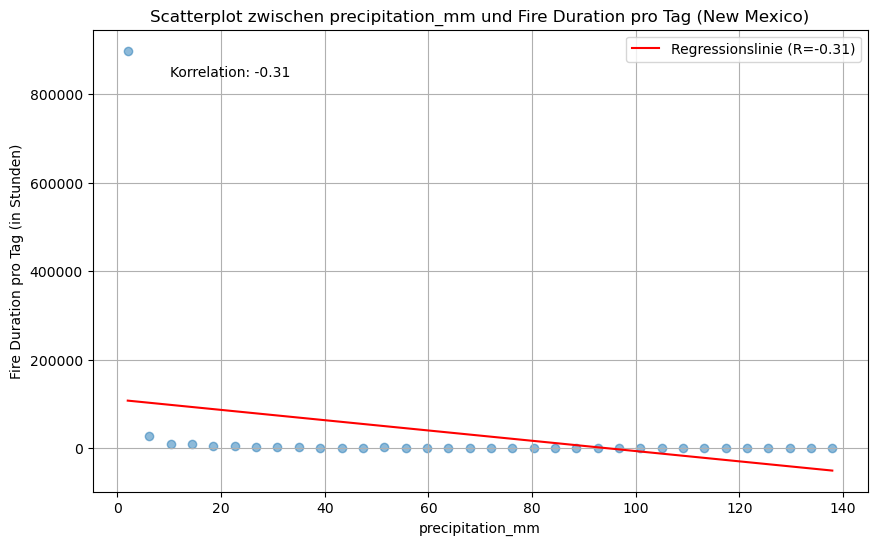

In [118]:
# Intervalle
num_intervals = 34
min_value = result['precipitation_mm'].min()
max_value = result['precipitation_mm'].max()
new_mexico_data = result[result['state_name'] == 'New Mexico']  # Hier ändert sich "Arizona" zu "New Mexico"
intervals = pd.cut(new_mexico_data['precipitation_mm'], bins=num_intervals, precision=2, include_lowest=True)
grouped_data = new_mexico_data.groupby(intervals)['fire_duration_per_day'].sum().reset_index()  # Hier ändert sich "Arizona" zu "New Mexico"

# Konvertiere die "precipitation_mm"-Kategorie in numerischen Wert
grouped_data['precipitation_mm'] = grouped_data['precipitation_mm'].apply(lambda x: x.mid).astype(float)

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['precipitation_mm'], grouped_data['fire_duration_per_day'], alpha=0.5)
plt.title('Scatterplot zwischen precipitation_mm und Fire Duration pro Tag (New Mexico)')  # Hier ändert sich "Arizona" zu "New Mexico"
plt.xlabel('precipitation_mm')
plt.ylabel('Fire Duration pro Tag (in Stunden)')
plt.grid(True)

# Lineare Regression 
slope, intercept, r_value, p_value, std_err = linregress(grouped_data['precipitation_mm'], grouped_data['fire_duration_per_day'])
regression_line = slope * grouped_data['precipitation_mm'] + intercept

# Korrelationskoeffizient 
correlation = grouped_data['precipitation_mm'].corr(grouped_data['fire_duration_per_day'])
plt.text(0.1, 0.9, f'Korrelation: {correlation:.2f}', transform=plt.gca().transAxes)

# Regressionslinie 
plt.plot(grouped_data['precipitation_mm'], regression_line, color='red', label=f'Regressionslinie (R={r_value:.2f})')

plt.legend()
plt.show()

# -0.31 Korrelation


Die Tabellen zeigen, dass es eine negative Korrelation zwischen Regenmenge und Waldbränden gibt. Insgesamt und in verschiedenen Bundesstaaten wie Idaho, Oregon, California, Arizona und New Mexico sinkt die Anzahl der Waldbrände, ihre Größe und Dauer mit steigendem Niederschlag. Dies bedeutet, dass mehr Regen mit weniger und kleineren Waldbränden sowie kürzeren Brandzeiten einhergeht.